In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [375]:
# Carregar o dataset
df_colesterol = pd.read_csv('datasets/dataset_colesterol.csv')

In [376]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [377]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [378]:
# Remover coluna ID
df_colesterol.drop('Id', axis=1, inplace=True)

In [379]:
df_colesterol.head()

,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [380]:
# Renomar colunas
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade_fisica', 'idade', 'peso', 'altura', 'nivel_colesterol']

In [381]:
df_colesterol.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [382]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [383]:
# Copiar DF para DF bucket
df_colesterol_bucket = df_colesterol.copy()

# EDA

In [384]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [385]:
# Verificar os tipos de dados unicos de fumantes
df_colesterol_eda['fumante'].unique()

array(['Sim', 'Não', nan], dtype=object)

In [386]:
# Verificar os tipos de dados unicos de nivel de atividade fisica
df_colesterol_eda['nivel_atividade_fisica'].unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [387]:
# Verificar os valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [388]:
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [389]:
# Coletar medidas das variaveis categoricas
moda_grupo_sanguineo = df_colesterol_eda['grupo_sanguineo'].mode()
moda_fumante = df_colesterol_eda['fumante'].mode()
moda_nivel_atividade_fisica = df_colesterol_eda['nivel_atividade_fisica'].mode()

In [390]:
# Coletar medidas das variaveis numericas
media_idade = df_colesterol_eda['idade'].mean()
media_peso = df_colesterol_eda['peso'].mean()   
media_altura = df_colesterol_eda['altura'].mean()

In [391]:
# Preencher valores ausentes
df_colesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sanguineo[0],
    'fumante': moda_fumante[0],
    'nivel_atividade_fisica': moda_nivel_atividade_fisica[0],
    'idade': media_idade,
    'peso': media_peso,
    'altura': media_altura    
}, inplace=True)

In [392]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   float64
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [393]:
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [394]:
# Converter idade e altura para o tipo inteiro
df_colesterol_eda['idade'] = df_colesterol_eda['idade'].astype(int)
df_colesterol_eda['altura'] = df_colesterol_eda['altura'].astype(int)

- Observação: Por isso é uma boa prática sempre tratar os valores ausentes, caso contrário essa conversão de tipo falharia nos valores ausentes.

In [395]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int32  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int32  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 47.0+ KB


<Axes: >

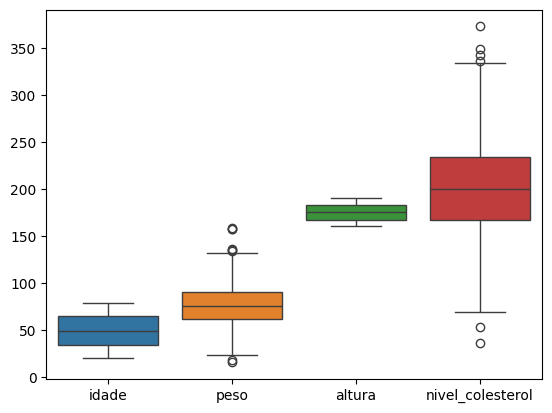

In [396]:
# Verificar outliers
sns.boxplot(data=df_colesterol_eda)

<Axes: xlabel='peso'>

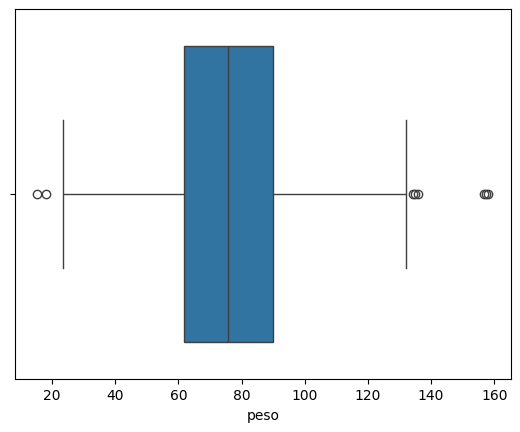

In [397]:
# Verificar outliers no peso
sns.boxplot(data=df_colesterol_eda['peso'], orient='h')

In [398]:
# Filtrar o publico a ser removido pelo peso
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

37

In [399]:
# Remover publico com peso menor que 40
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, inplace=True)

<Axes: xlabel='peso'>

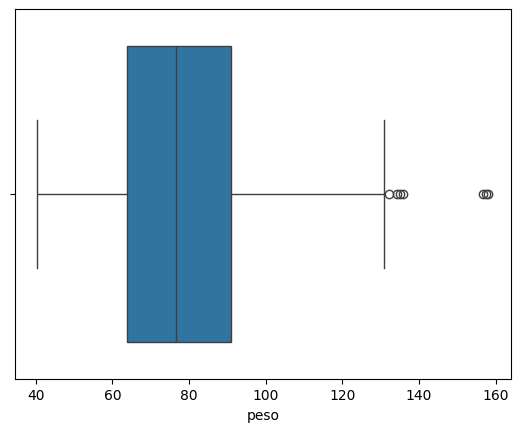

In [400]:
# Verificar outliers no peso
sns.boxplot(data=df_colesterol_eda['peso'], orient='h')

<Axes: xlabel='nivel_colesterol'>

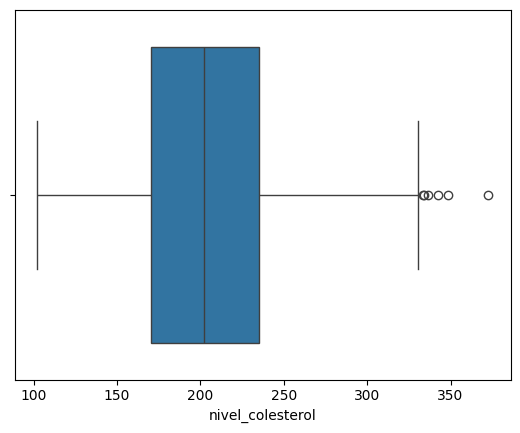

In [401]:
# Verificar outliers no nível do colesterol
sns.boxplot(data=df_colesterol_eda['nivel_colesterol'], orient='h')

In [402]:
# Filtrar o publico a ser removido pelo nível do colesterol
df_colesterol_eda[df_colesterol_eda['nivel_colesterol'] > 300].nivel_colesterol.count()

22

- No caso do nível do colesterol os valores altos podem fazer sentido, por isso não iremos remover esses outliers.

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

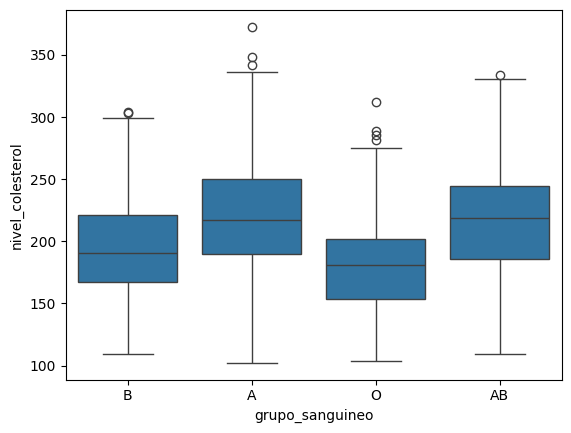

In [403]:
# Cruzamento de variaveis Categoricas com Nivel de colesterol (grupo_sanguineo)
sns.boxplot(x='grupo_sanguineo', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

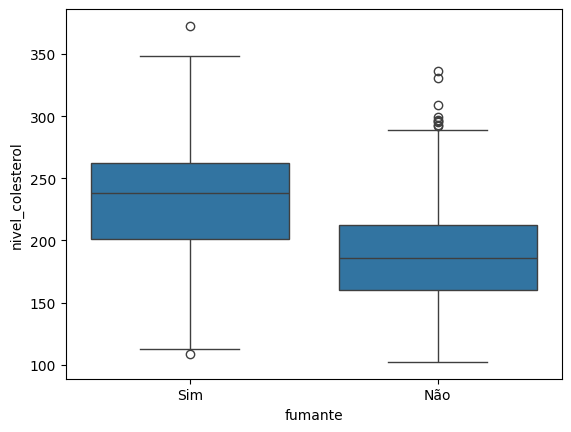

In [404]:
# Cruzamento de variaveis Categoricas com Nivel de colesterol (fumante)
sns.boxplot(x='fumante', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

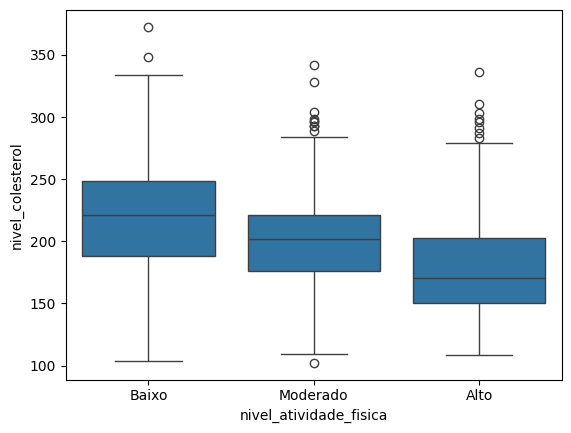

In [405]:
# Cruzamento de variaveis Categoricas com Nivel de colesterol (nivel_atividade_fisica)
sns.boxplot(x='nivel_atividade_fisica', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

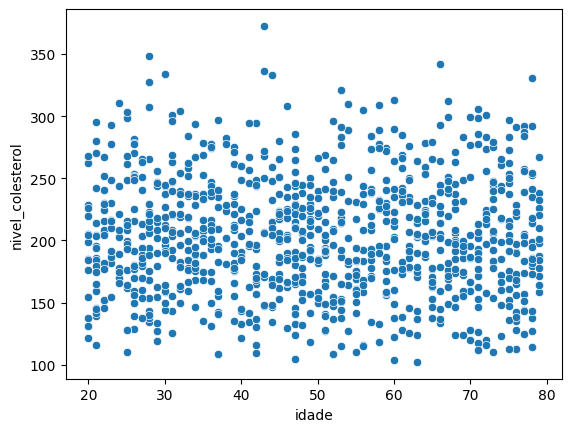

In [406]:
# Cruzamento variáveis numericas com Nivel de colesterol (idade)
sns.scatterplot(x='idade', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

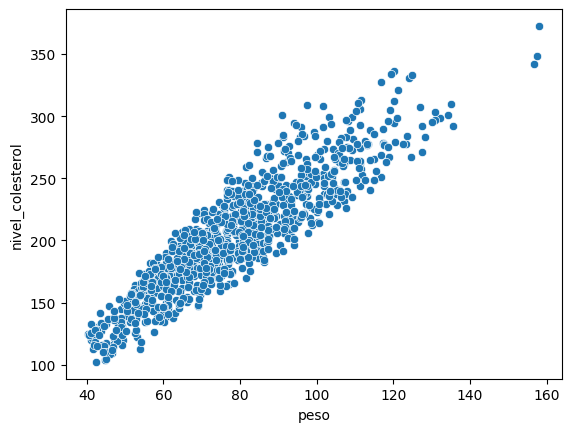

In [407]:
# Cruzamento variáveis numericas com Nivel de colesterol (peso)
sns.scatterplot(x='peso', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

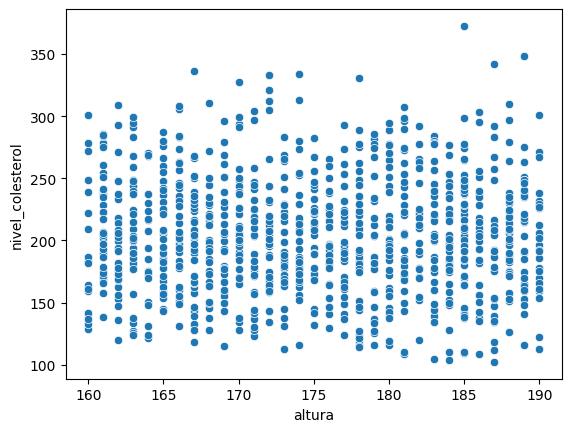

In [408]:
# Cruzamento variáveis numericas com Nivel de colesterol (altura)
sns.scatterplot(x='altura', y='nivel_colesterol', data=df_colesterol_eda)

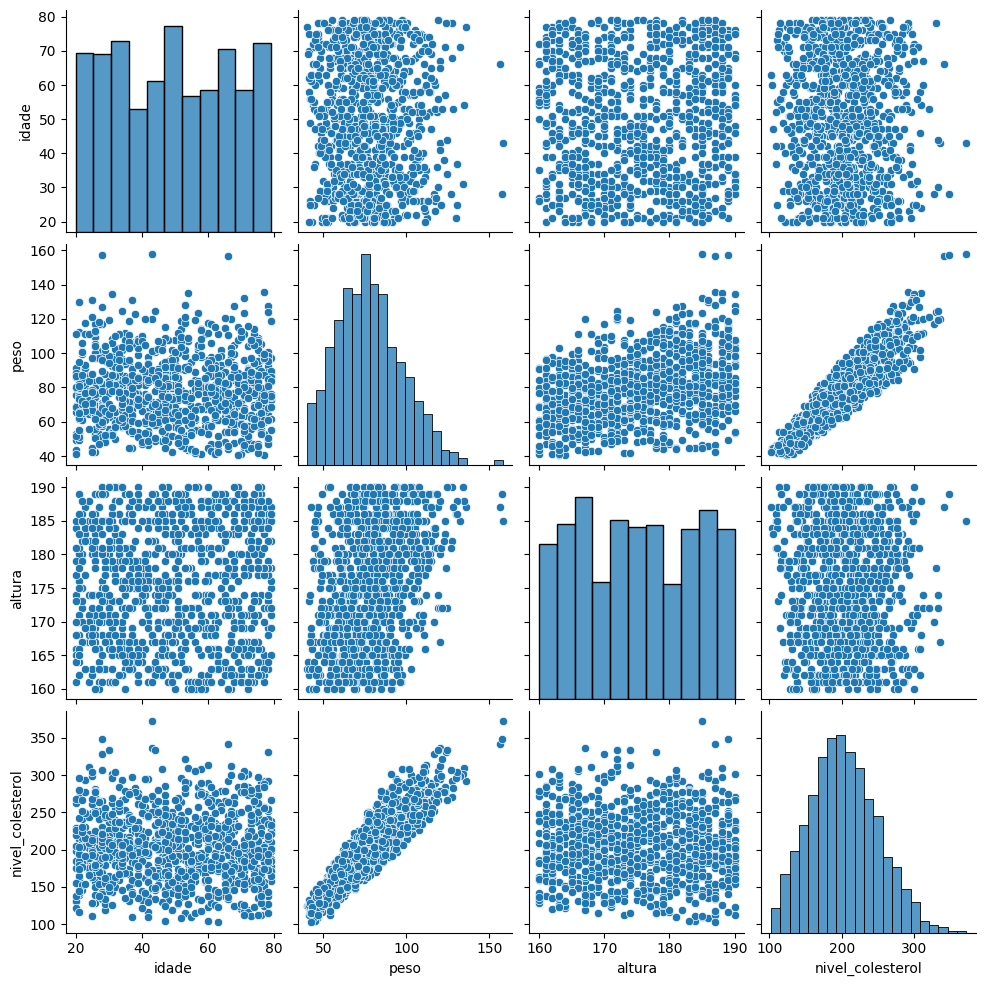

In [409]:
sns.pairplot(df_colesterol_eda)

In [410]:
# Converter variaveis categoricas nominais para numericas, utilizando o metodo de codificacao one-hot
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'])

In [411]:
df_colesterol_eda.head()

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,False,False,True,False,False,True
1,Moderado,68,105.0,184,236.98,True,False,False,False,True,False
2,Alto,25,64.8,180,161.79,False,False,False,True,True,False
3,Alto,43,120.2,167,336.24,True,False,False,False,True,False
4,Baixo,79,88.5,175,226.23,False,True,False,False,True,False


In [412]:
# Converter variavel categorica ordinal para numerica, ultilizando o factorize
df_colesterol_eda.nivel_atividade_fisica = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1

In [413]:
df_colesterol_eda.head()

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,False,False,True,False,False,True
1,2,68,105.0,184,236.98,True,False,False,False,True,False
2,3,25,64.8,180,161.79,False,False,False,True,True,False
3,3,43,120.2,167,336.24,True,False,False,False,True,False
4,1,79,88.5,175,226.23,False,True,False,False,True,False


<Axes: >

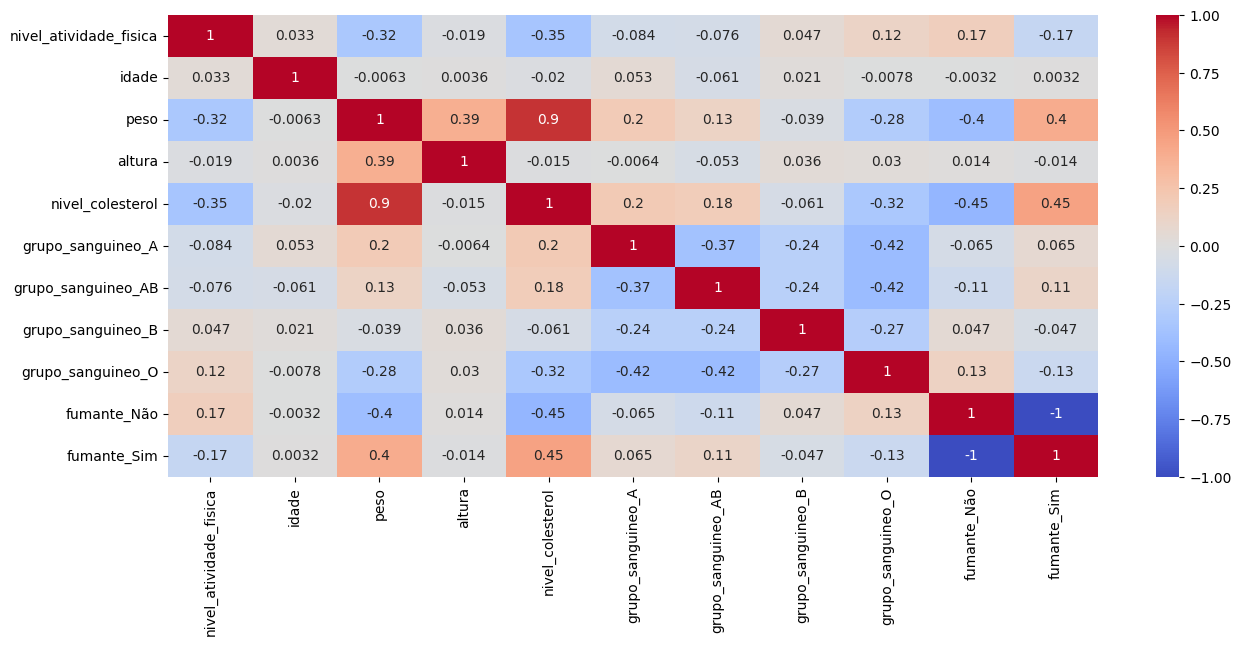

In [414]:
# Mapa de calor com Correlacao entre as variaveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

<Axes: >

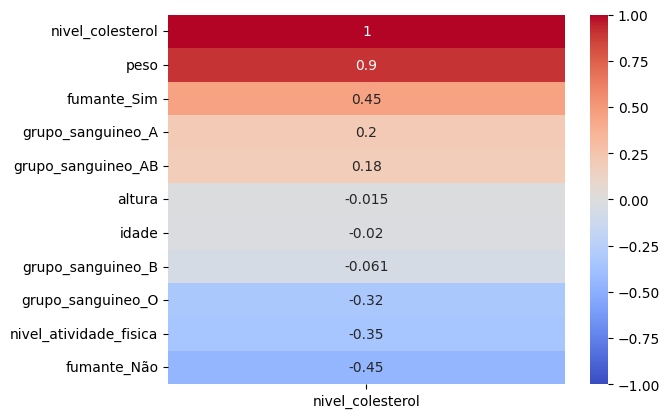

In [415]:
# Formato de Ranking, somente correlação com a variável target
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), annot=True, vmax=1, vmin=-1, cmap='coolwarm')
# df_colesterol_eda.corr()['nivel_colesterol'].sort_values(ascending=False)

In [416]:
# Bucketing idade
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
df_colesterol_bucket['escala_idade'] = pd.cut(df_colesterol_bucket['idade'], bins=bins, labels=labels, include_lowest=True)

In [417]:
df_colesterol_bucket

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-80
...,...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31.0,68.1,166.0,206.81,30-39
996,O,Não,Alto,51.0,47.7,170.0,128.03,50-59
997,AB,Não,Baixo,39.0,85.5,176.0,211.14,30-39
998,AB,Sim,Baixo,61.0,91.2,161.0,284.53,60-69


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

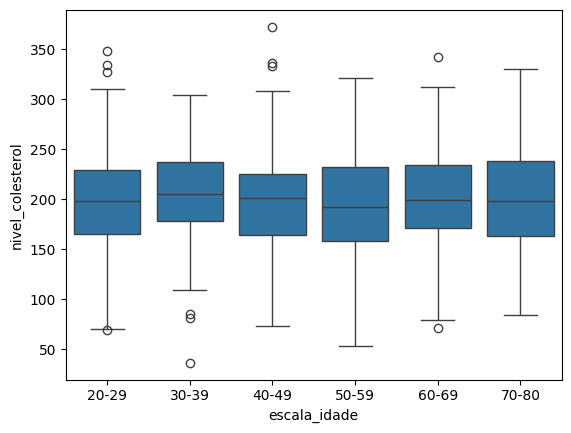

In [418]:
sns.boxplot(x='escala_idade', y='nivel_colesterol', data=df_colesterol_bucket)

In [419]:
# Bucketing peso
bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-160']
df_colesterol_bucket['escala_peso'] = pd.cut(df_colesterol_bucket['peso'], bins=bins, labels=labels, include_lowest=True)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

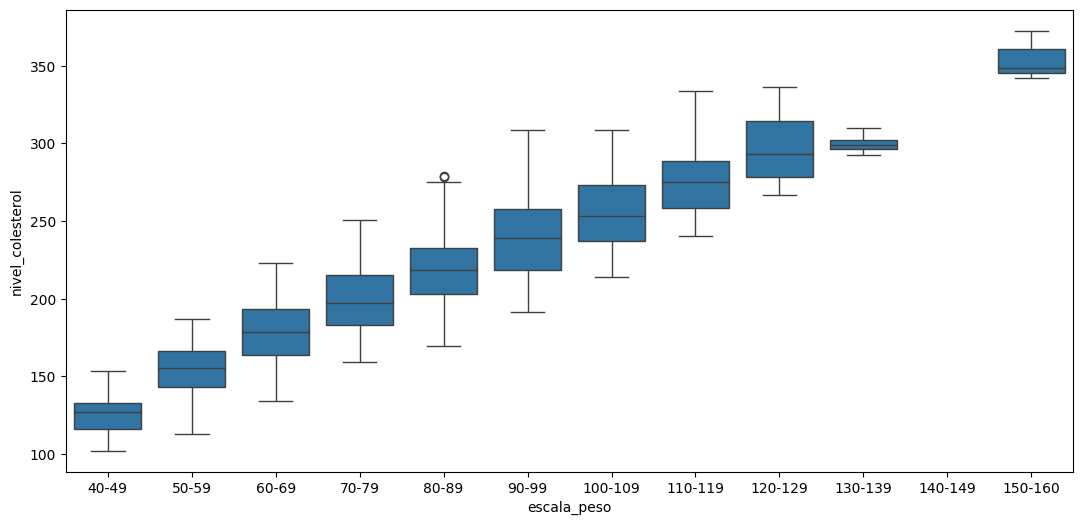

In [420]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='escala_peso', y='nivel_colesterol', data=df_colesterol_bucket)

# Split do Dataset Treino e Teste

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [422]:
# Criar Dataset de treino e teste
# Removendo outliers de peso
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, inplace=True)

In [423]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [424]:
X = df_colesterol.drop('nivel_colesterol', axis=1)
y = df_colesterol['nivel_colesterol']

In [425]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [426]:
X_train.shape

(674, 6)

In [427]:
X_test.shape

(289, 6)

In [428]:
# Pipeline
# Imputar moda nas variáveis categoricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Imputar mediana nas variáveis numéricas - idade, peso, altura
# Padronizar variáveis numéricas - idade, peso, altura
# OneHotEncoder nas variáveis categóricas nominais - grupo_sanguineo, fumante
# OrdinalEncoder nas variáveis categóricas ordinais - nivel_atividade_fisica

# Nomes das Colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante', 'nivel_atividade_fisica']
colunas_numericas = ['idade', 'peso', 'altura']
colunas_ordinais = ['nivel_atividade_fisica']

In [429]:
# Criação do Pipeline de Transforção de Dados categoricos (transformer)
transformer_categoricas = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ],
)

- Boa prática, fazer o one hot encoding depois de dividir o dataset em treino e teste. Pois, se fizermos antes, podemos ter valores diferentes de features em treino e teste. Isso é chamado de data leakage.

In [430]:
# Transformar para as variáveis ordinais
transformer_ordinais = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='error', categories=[['Baixo', 'Moderado', 'Alto']]))
    ],
)

In [431]:
# Transformer numérico
transformer_numericas = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ],
)

In [432]:
# Criar um ColumnTransformer que encapsula todos os transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categoricas, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_ordinais)
    ],
)

In [433]:
# Criar um Pipeline que encapsula o ColumnTransformer e o modelo de Regressão Linear
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ],
)

In [434]:
# Treinar o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo', 'fumante',
                                                   'nivel_atividade_fisica']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('model', LinearRegression())])

# Análise de Métricas

In [435]:
# Calcular predições
y_pred = model.predict(X_test)

In [436]:
# Calcular o R2 Score
r2_score(y_test, y_pred)

0.9594142881634002

In [437]:
# Calcular o Mean Absolute Error
mean_absolute_error(y_test, y_pred)

7.301064013840829

In [438]:
# Calcular o RMSE - Root Mean Squared Error
root_mean_squared_error(y_test, y_pred)

9.098858179867166

- Lembrando que o r2 score é uma métrica que varia de 0 a 1, onde 1 é o melhor valor. 
- E o mean absolute error é uma métrica que varia de 0 ao infinito, onde 0 é o melhor valor.
- E o root mean squared error é uma métrica que varia de 0 ao infinito, onde 0 é o melhor valor.

# Análise de Resíduos

In [439]:
# Calcular residuos
residuos = y_test - y_pred

In [440]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao
residuos_padronizados = (residuos - residuos.mean()) / residuos.std()
residuos_padronizados

520    1.407955
222   -1.469521
633   -1.064490
528   -0.456395
867   -0.519510
         ...   
48     0.044131
191   -0.810935
313    0.068279
601    1.236722
980   -0.788707
Name: nivel_colesterol, Length: 289, dtype: float64

In [441]:
# Outra maneira de calcular os residuos padronizados
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos_std

520    1.410397
222   -1.472070
633   -1.066337
528   -0.457187
867   -0.520411
         ...   
48     0.044207
191   -0.812341
313    0.068397
601    1.238867
980   -0.790075
Name: nivel_colesterol, Length: 289, dtype: float64

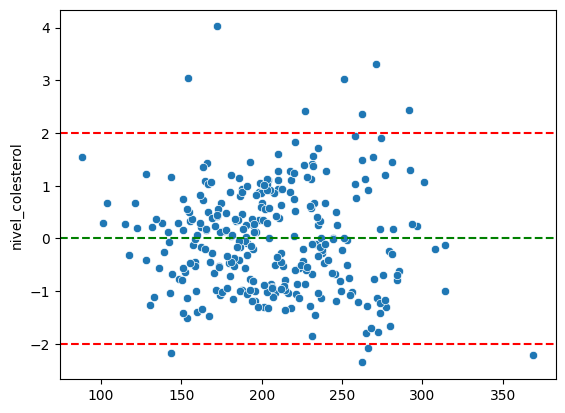

In [442]:
# Análise gráfica dos residuos, para verificar linearidade dos residuos estão entre -2 e 2.
# Verificar homocedasticidade: os residuos estão distribuidos de forma homogênea, valores em torno da reta.
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(0, color='g', linestyle='--')
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')

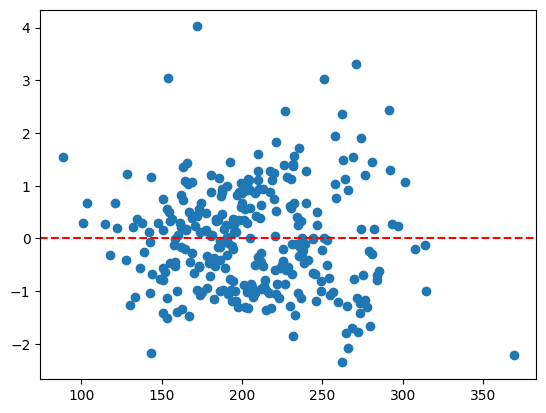

In [443]:
plt.scatter(y_pred, residuos_std)
plt.axhline(0, color='red', linestyle='--')

((array([-2.82075228, -2.52320945, -2.35464121, -2.23446819, -2.13988614,
         -2.06128713, -1.99367721, -1.9341147 , -1.88071489, -1.83219483,
         -1.78764014, -1.74637523, -1.70788622, -1.67177275, -1.63771659,
         -1.60546043, -1.57479314, -1.54553923, -1.51755122, -1.49070387,
         -1.46488995, -1.44001686, -1.41600406, -1.39278108, -1.37028585,
         -1.34846343, -1.32726493, -1.30664665, -1.28656935, -1.26699768,
         -1.24789966, -1.22924626, -1.21101103, -1.19316985, -1.17570058,
         -1.15858292, -1.14179818, -1.12532909, -1.10915971, -1.09327523,
         -1.07766191, -1.06230698, -1.0471985 , -1.03232537, -1.01767716,
         -1.00324412, -0.98901709, -0.97498749, -0.96114722, -0.94748865,
         -0.9340046 , -0.92068826, -0.90753321, -0.89453338, -0.88168298,
         -0.86897656, -0.85640891, -0.84397509, -0.83167041, -0.81949037,
         -0.80743071, -0.79548735, -0.7836564 , -0.77193413, -0.760317  ,
         -0.74880157, -0.7373846 , -0.

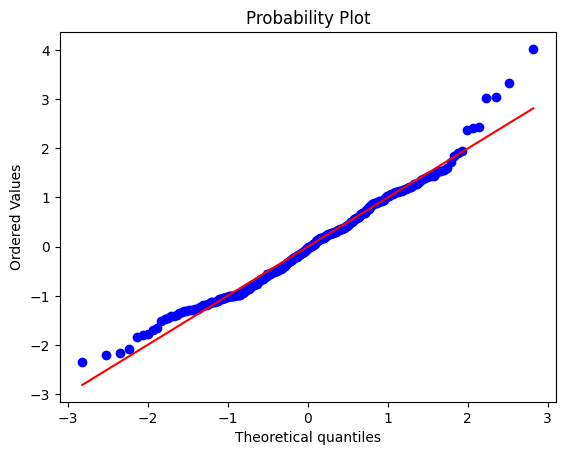

In [444]:
# Gráfico para testar a normalidade dos residuos
import scipy.stats as stats
stats.probplot(residuos_std, plot=plt)

Text(0.5, 1.0, 'QQ Plot dos Resíduos Padronizados')

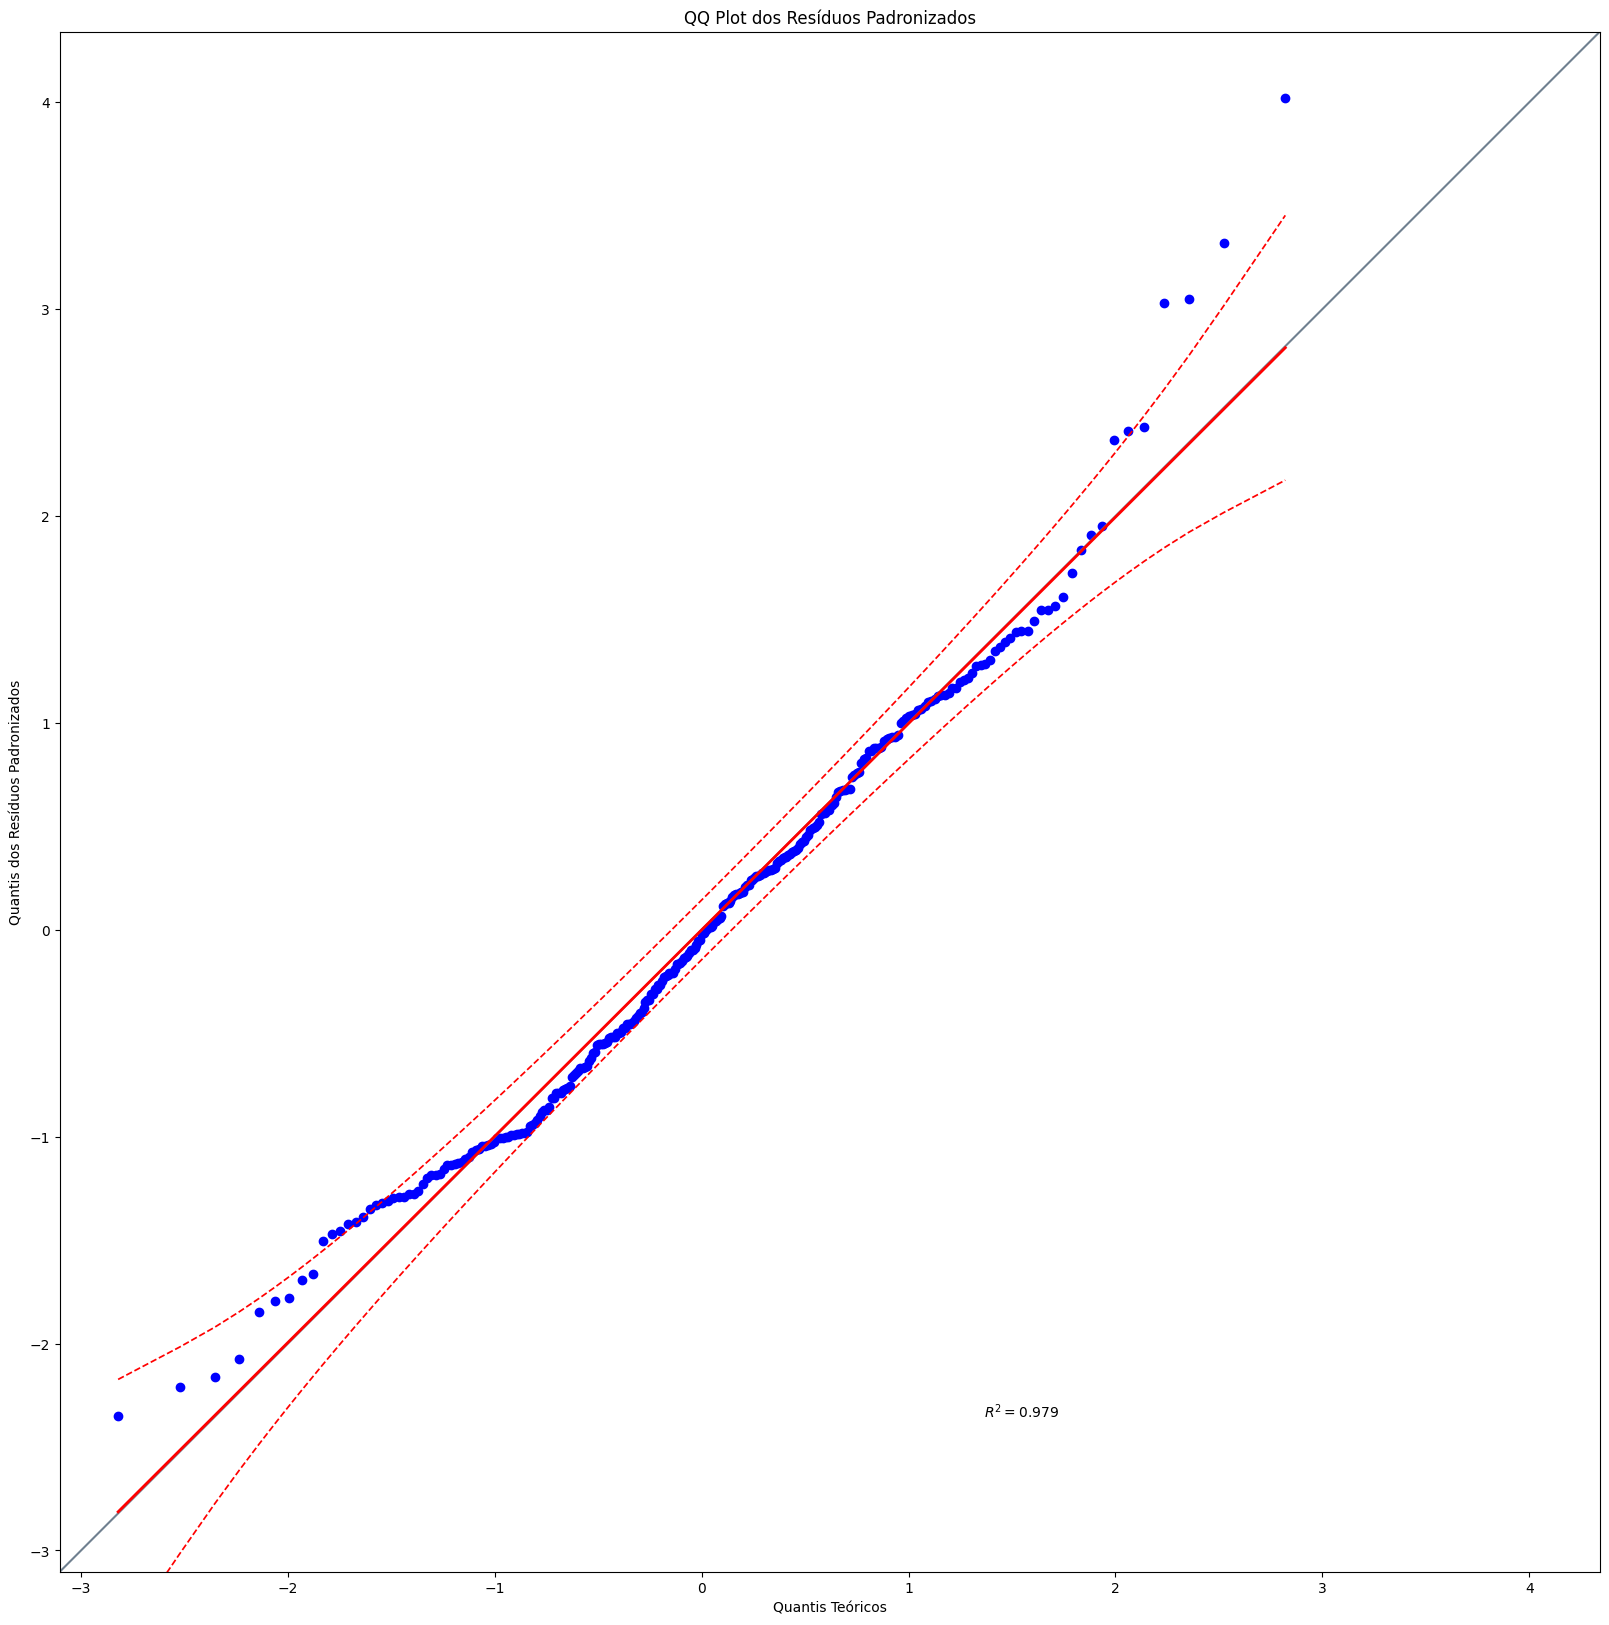

In [445]:
# QQ plot
import pingouin as pg
plt.figure(figsize=(20, 20))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos Padronizados')
plt.title('QQ Plot dos Resíduos Padronizados')

In [446]:
# Teste de normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt


stat_shapiro, p_value_shapiro = shapiro(residuos_std)
print(f'Estatística de Teste de Shapiro-Wilk: {stat_shapiro} e p-valor: {p_value_shapiro}')

Estatística de Teste de Shapiro-Wilk: 0.9795538503417996 e p-valor: 0.00037515532650084655


# Teste de normalidade de Shapiro-Wilk
- A hipótese nula é que a amostra é proveniente de uma distribuição normal.
- Se o p-value for menor que 0.05, rejeitamos a hipótese nula.
- Se o p-value for maior que 0.05, não rejeitamos a hipótese nula.
- Ou seja, se o p-value for menor que 0.05, a amostra não é proveniente de uma distribuição normal.

In [447]:
# Teste de normalidade de Kolmogorov-Smirnov
stat_kstest, p_value_kstest = kstest(residuos_std, 'norm')
print(f'Estatística de Teste de Kolmogorov-Smirnov: {stat_kstest} e p-valor: {p_value_kstest}')

Estatística de Teste de Kolmogorov-Smirnov: 0.04479277566145501 e p-valor: 0.5918852396900622


# Teste de normalidade de Kolmogorov-Smirnov
- A hipótese nula é que a amostra é proveniente de uma distribuição normal.
- Se o p-value for menor que 0.05, rejeitamos a hipótese nula.
- Se o p-value for maior que 0.05, não rejeitamos a hipótese nula.
- Ou seja, se o p-value for menor que 0.05, a amostra não é proveniente de uma distribuição normal.

In [448]:
# Teste de normalidade de Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuos_std, dist='norm')
print(f'Estatística de Teste de Lilliefors: {stat_lilliefors} e p-valor: {p_value_lilliefors}')

Estatística de Teste de Lilliefors: 0.04451054628098994 e p-valor: 0.2362741009393384


In [449]:
# Teste de normalidade de Anderson-Darling
stat_anderson, critical_anderson, significance_anderson  = anderson(residuos_std, dist='norm')
print(f'Estatística de Teste de Anderson-Darling: {stat_anderson} e valor crítico: {critical_anderson[2]}')

Estatística de Teste de Anderson-Darling: 0.9631581626208572 e valor crítico: 0.776


- Se a estatística tiver um valor menor que o valor crítico, significa que a amostra é proveniente de uma distribuição normal. Como o valor da estatística é maior que o valor crítico, rejeitamos a hipótese nula. Ou seja, a amostra não é proveniente de uma distribuição normal.

In [450]:
critical_anderson

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [451]:
significance_anderson

array([15. , 10. ,  5. ,  2.5,  1. ])

In [452]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor)
    ],
)
X_test_transformed = pipe.fit_transform(X_test)

In [453]:
X_test_transformed

array([[-1.44340738,  0.22608781, -0.58669129, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.28157488, -1.20886474, -1.05685776, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.84754575, -0.35160806, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.09014564, -1.52702423, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.28056099,  0.17447081, -0.35160806, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.65277092, -1.17439938, ...,  1.        ,
         0.        ,  0.        ]])

In [454]:
# Teste de Goldfeld-Quandt
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print(f'Estatística de Teste de Goldfeld-Quandt: {stat_goldfeld} e p-valor: {p_value_goldfeld}')

Estatística de Teste de Goldfeld-Quandt: 0.6736078803107044 e p-valor: 0.9886579796116495


# Predições individuais

In [455]:
predicao_indivudual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto',
    'idade': 40,
    'peso': 70,
    'altura': 180
}

df_predicao = pd.DataFrame(predicao_indivudual, index=[1])

In [456]:
df_predicao

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [457]:
# Predição
y_pred_individual = model.predict(df_predicao)
y_pred_individual

array([165.25])

In [458]:
import joblib

In [459]:
# Salvar o modelo
joblib.dump(model, 'models/model_colesterol.pkl')

['models/model_colesterol.pkl']